In [1]:
import pystac as stac

In [3]:
from urllib.parse import urlparse
import boto3
from pystac import STAC_IO

def my_read_method(uri):
    parsed = urlparse(uri)
    if parsed.scheme == 's3':
        bucket = parsed.netloc
        key = parsed.path[1:]
        s3 = boto3.resource('s3')
        obj = s3.Object(bucket, key)
        return obj.get()['Body'].read().decode('utf-8')
    else:
        return STAC_IO.default_read_text_method(uri)

def my_write_method(uri, txt):
    parsed = urlparse(uri)
    if parsed.scheme == 's3':
        bucket = parsed.netloc
        key = parsed.path[1:]
        s3 = boto3.resource("s3")
        s3.Object(bucket, key).put(Body=txt)
    else:
        STAC_IO.default_write_text_method(uri, txt)

STAC_IO.read_text_method = my_read_method
STAC_IO.write_text_method = my_write_method

In [5]:
cat = stac.Catalog.from_file('s3://raster-vision-rob-dev/stac-packer/bae/angola-cog-water-label/catalog.json')

In [7]:
items = list(cat.get_all_items())

In [8]:
len(items)

2404

In [9]:
label_items = [i for i in items if isinstance(i, stac.LabelItem)]

In [10]:
len(label_items)

1202

In [76]:
targets = list(filter(lambda x: '5-S2A_MSIL1C_20190709T084601_N0208_R107_T33LZL_20190709T105334-101' in next(iter(x.get_sources())).id, label_items))



In [77]:
li = targets[0]

In [78]:
li.assets

{'78f8f48e-a6d7-4e1a-9b1a-dd4df92115bc': <Asset href=s3://raster-vision-rob-dev/stac-packer/bae/angola-cog-water-label/35e2d746-2f65-4596-bad6-195bda0b5a90/78f8f48e-a6d7-4e1a-9b1a-dd4df92115bc/data.geojson>}

In [79]:
gj = stac.STAC_IO.read_json(next(iter(li.assets.values())).href)

In [80]:
from shapely.geometry import shape

In [81]:
len(gj['features'])

1

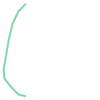

In [82]:
shape(gj['features'][0]['geometry'])

In [83]:
shape(gj['features'][1]['geometry'])

IndexError: list index out of range

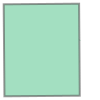

In [84]:
shape(li.geometry).union(shape(gj['features'][0]['geometry']))

In [85]:
gj['features'].append(li.to_dict())

In [86]:
import json

In [87]:
print(json.dumps(gj, indent=2))

{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "tippecanoe": {
        "layer": "osm",
        "minzoom": 12,
        "maxzoom": 12
      },
      "properties": {
        "@type": "way",
        "@id": 160930185,
        "@version": 7,
        "@changeset": 76160041,
        "@uid": 9446950,
        "@user": "Olentangy",
        "@timestamp": 1571927803,
        "boat": "no",
        "name": "Kwango",
        "name:fr": "Kwango",
        "name:pt": "Kwango",
        "waterway": "river",
        "class_id": "1"
      },
      "geometry": {
        "type": "LineString",
        "coordinates": [
          [
            17.998117519034825,
            -8.900106006634156
          ],
          [
            17.997234,
            -8.899896
          ],
          [
            17.996324,
            -8.898969
          ],
          [
            17.995584,
            -8.898014
          ],
          [
            17.995499,
            -8.896918
      